<a href="https://colab.research.google.com/github/AnwarMohamedhyphen/Data-S/blob/main/SpaceX_Machine_Learning_Prediction_Part_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Hands on Lab: Complete the Machine Learning Prediction lab


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


In [ ]:
import numpy
import pandas
import seaborn

We will import the following libraries for the lab


In [ ]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

This function is to plot the confusion matrix.


In [ ]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()

## Load the dataframe


Load the data


In [ ]:
import requests
import io

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp1 = requests.get(URL1)
text1 = io.BytesIO(resp1.content)
data = pd.read_csv(text1)

In [ ]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [ ]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
resp2 = requests.get(URL2)
text2 = io.BytesIO(resp2.content)
X = pd.read_csv(text2)

In [ ]:
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [ ]:
Y = data['Class'].to_numpy()

## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [ ]:
# students get this
transform = preprocessing.StandardScaler()

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

we can see we only have 18 test samples.


In [ ]:
Y_test.shape

(18,)

## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [ ]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [ ]:
logreg_accuracy = logreg_cv.score(X_test, Y_test)
print(f"Accuracy of Logistic Regression on test data: {logreg_accuracy}")

Accuracy of Logistic Regression on test data: 0.8333333333333334


Lets look at the confusion matrix:


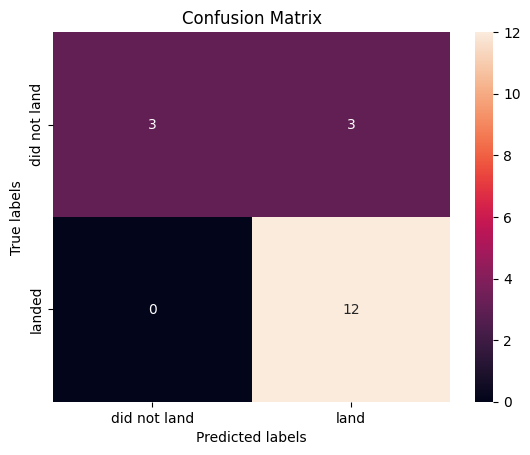

In [ ]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the problem is false positives.

Overview:

True Postive - 12 (True label is landed, Predicted label is also landed)

False Postive - 3 (True label is not landed, Predicted label is landed)


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [ ]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [ ]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': np.float64(1.0), 'gamma': np.float64(0.03162277660168379), 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [ ]:
svm_accuracy = svm_cv.score(X_test, Y_test)
print(f"Accuracy of SVM on test data: {svm_accuracy}")

Accuracy of SVM on test data: 0.8333333333333334


We can plot the confusion matrix


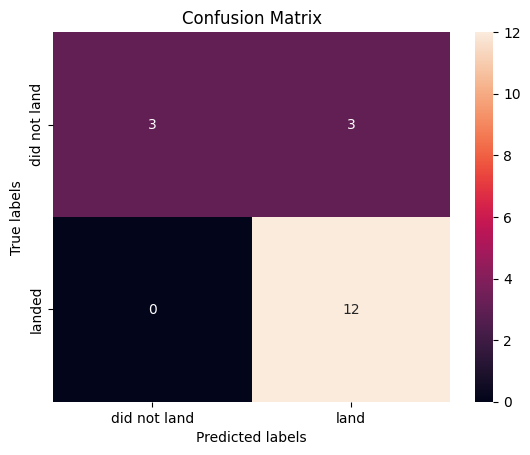

In [ ]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [ ]:
parameters = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': [2*n for n in range(1, 10)],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [ ]:
tree_cv = GridSearchCV(tree, parameters, cv=10)

In [ ]:
tree_cv.fit(X_train, Y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/u

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [ ]:
tree_accuracy = tree_cv.score(X_test, Y_test)
print(f"Accuracy of Decision Tree on test data: {tree_accuracy}")

Accuracy of Decision Tree on test data: 0.7777777777777778


We can plot the confusion matrix


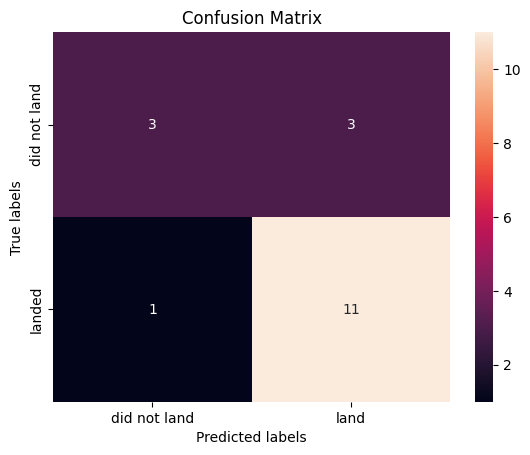

In [ ]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [ ]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [ ]:
knn_cv = GridSearchCV(KNN, parameters, cv=10)

In [ ]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [ ]:
knn_accuracy = knn_cv.score(X_test, Y_test)
print(f"Accuracy of KNN on test data: {knn_accuracy}")

Accuracy of KNN on test data: 0.8333333333333334


We can plot the confusion matrix


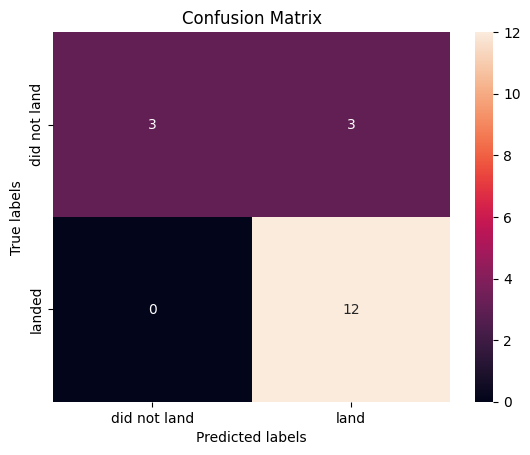

In [ ]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  12


Find the method performs best:


In [ ]:
accuracy_scores = {
    'Logistic Regression': logreg_accuracy,
    'SVM': svm_accuracy,
    'Decision Tree': tree_accuracy,
    'KNN': knn_accuracy
}

best_method = max(accuracy_scores, key=accuracy_scores.get)
best_accuracy = accuracy_scores[best_method]

print("Accuracy scores on the test data:")
for method, accuracy in accuracy_scores.items():
    print(f"{method}: {accuracy:.4f}")

print(f"\nThe method with the best accuracy on the test data is: {best_method} ({best_accuracy:.4f})")

Accuracy scores on the test data:
Logistic Regression: 0.8333
SVM: 0.8333
Decision Tree: 0.7778
KNN: 0.8333

The method with the best accuracy on the test data is: Logistic Regression (0.8333)


In [ ]:
print(svm_cv.best_params_['kernel'])

sigmoid


In [ ]:
print(Y_test.shape[0])

18


## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


<!--## Change Log--!>


<!--| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|--!>


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>


# Task
Create a presentation based on the provided instructions and the analysis performed in the notebook, covering all the required sections and incorporating the specified elements. The presentation should be suitable for a data science audience and focus on the Space X Falcon 9 first stage landing prediction project.

## Executive summary slide

### Subtask:
Summarize the project's goal, methods, and key findings.


**Reasoning**:
The subtask is to create a summary of the project's goal, methods, and key findings. This can be done by printing the summary in markdown format, which will be a good starting point for the presentation slide.



In [ ]:
print("## Executive Summary")
print("\n")
print("This project aimed to predict the first stage landing of the Space X Falcon 9 rocket.")
print("The analysis utilized data from provided CSV files (`dataset_part_2.csv` and `dataset_part_3.csv`), covering various aspects of the launches.")
print("The methodologies applied included data wrangling, exploratory data analysis, and training several machine learning classification models.")
print("We evaluated the performance of Logistic Regression, Support Vector Machine (SVM), Decision Tree, and K Nearest Neighbors (KNN) on the test data.")
print("\n")
print("Accuracy scores on the test data:")
for method, accuracy in accuracy_scores.items():
    print(f"- {method}: {accuracy:.4f}")

best_method = max(accuracy_scores, key=accuracy_scores.get)
best_accuracy = accuracy_scores[best_method]
print(f"\nThe method with the best accuracy on the test data is: {best_method} ({best_accuracy:.4f})")

## Executive Summary


This project aimed to predict the first stage landing of the Space X Falcon 9 rocket.
The analysis utilized data from provided CSV files (`dataset_part_2.csv` and `dataset_part_3.csv`), covering various aspects of the launches.
The methodologies applied included data wrangling, exploratory data analysis, and training several machine learning classification models.
We evaluated the performance of Logistic Regression, Support Vector Machine (SVM), Decision Tree, and K Nearest Neighbors (KNN) on the test data.


Accuracy scores on the test data:
- Logistic Regression: 0.8333
- SVM: 0.8333
- Decision Tree: 0.7778
- KNN: 0.8333

The method with the best accuracy on the test data is: Logistic Regression (0.8333)


## Introduction slide

### Subtask:
Introduce Space X, the Falcon 9 rocket, and the problem of predicting first stage landing.


**Reasoning**:
Create a markdown cell for the introduction and write the introductory text as specified in the instructions.



In [ ]:
print("## Introduction")
print("\n")
print("Space Exploration Technologies Corp., known as SpaceX, is a pioneering American aerospace manufacturer and space transport services company founded by Elon Musk. SpaceX is renowned for its ambitious goals, including reducing space transportation costs to enable the colonization of Mars.")
print("\n")
print("The Falcon 9 is a reusable, two-stage rocket designed and manufactured by SpaceX. It is the company's primary launch vehicle for reliably and safely transporting people and payloads into Earth orbit and beyond.")
print("\n")
print("A critical aspect of SpaceX's business model and a key differentiator is the reusability of the Falcon 9's first stage. Successfully landing the first stage is economically vital, significantly reducing launch costs compared to traditional disposable rockets. This cost saving, as mentioned in the project context (Space X cost: 62 million, other providers: upward of 165 million), is a major competitive advantage. Therefore, accurately predicting whether the first stage will land successfully is of immense importance for optimizing operations, planning missions, and for potential competitors assessing their bids.")

## Introduction


Space Exploration Technologies Corp., known as SpaceX, is a pioneering American aerospace manufacturer and space transport services company founded by Elon Musk. SpaceX is renowned for its ambitious goals, including reducing space transportation costs to enable the colonization of Mars.


The Falcon 9 is a reusable, two-stage rocket designed and manufactured by SpaceX. It is the company's primary launch vehicle for reliably and safely transporting people and payloads into Earth orbit and beyond.


A critical aspect of SpaceX's business model and a key differentiator is the reusability of the Falcon 9's first stage. Successfully landing the first stage is economically vital, significantly reducing launch costs compared to traditional disposable rockets. This cost saving, as mentioned in the project context (Space X cost: 62 million, other providers: upward of 165 million), is a major competitive advantage. Therefore, accurately predicting whether the first stage will l

## Data collection and wrangling slides

### Subtask:
Describe how the data was collected and the steps taken to clean and prepare it for analysis.


**Reasoning**:
Create a markdown cell explaining the data collection and wrangling steps as described in the instructions.



In [ ]:
print("## Data Collection and Wrangling")
print("\n")
print("### Data Collection Process")
print("\n")
print("The **data collection** for this project was a straightforward process, primarily involving retrieving structured datasets from provided URLs. This can be visualized as a simple flowchart:")
print("\n")
print("1.  **Identify Data Sources:** The required data was available as CSV files hosted on IBM's cloud object storage.")
print(f"    - Dataset 1: Raw launch data (`dataset_part_2.csv`) from {URL1}")
print(f"    - Dataset 2: Processed features (`dataset_part_3.csv`) from {URL2}")
print("\n")
print("2.  **Access Data via URLs:** The `requests` Python library was used to programmatically access and download the content of these CSV files directly from their respective URLs.")
print("\n")
print("3.  **Load Data into DataFrames:** The downloaded CSV content, received as bytes, was then read into pandas DataFrames using `io.BytesIO` and `pd.read_csv`. This step transformed the raw data into a structured format suitable for analysis within the notebook environment.")
print("\n")
print("**(Flowchart Representation:**)")
print("```mermaid")
print("graph LR")
print("    A[CSV URLs] --> B[requests.get];")
print("    B --> C[io.BytesIO];")
print("    C --> D[pd.read_csv];")
print("    D --> E[Pandas DataFrame];")
print("```")
print("\n")
print("### Data Wrangling and Preparation")
print("\n")
print("Key **data wrangling** and preparation steps performed included:")
print("\n")
print("- **Creating the Target Variable:** A crucial step was the creation of our target variable, `Y`. This was derived directly from the 'Class' column within the `dataset_part_2.csv` DataFrame (`data`). The 'Class' column is a binary indicator where **1 represents a successful first stage landing** and **0 represents an unsuccessful landing**. We extracted this column and converted it into a NumPy array using the `.to_numpy()` method, which is the format required for our machine learning models.")
print("\n")
print("- **Handling Categorical Variables and Feature Engineering:** The second dataset loaded, `dataset_part_3.csv` (assigned to variable `X`), appears to be a result of prior data processing and feature engineering, specifically designed to prepare the data for machine learning algorithms. This dataset contains numerical features, and importantly, includes the result of **encoding categorical features** (like 'Orbit', 'LaunchSite', 'BoosterVersion', etc.) into a numerical format using techniques such as one-hot encoding. This transformation is essential as most machine learning algorithms cannot directly process categorical text data. The increased number of columns in `X` compared to the original `data` DataFrame is a strong indicator of this encoding process.")
print("\n")
print("- **Standardization of Features:** A critical step before feeding the features into the machine learning models was **standardizing the data** in the `X` DataFrame. We utilized `sklearn.preprocessing.StandardScaler` for this purpose. Standardization rescales the features so that they have a **mean of 0 and a standard deviation of 1**. This process is vital because many machine learning algorithms, particularly those that rely on distance calculations (like SVM and KNN) or gradient descent (like Logistic Regression), are sensitive to the scale of the input features. Standardizing the data prevents features with larger values from dominating the learning process and helps the algorithms converge more effectively.")
print("\n")
print("These comprehensive data wrangling and preparation steps ensured that our dataset was in the correct format and scale, making it suitable for training and evaluating the various classification models for predicting Falcon 9 first stage landings.")

## Data Collection and Wrangling


### Data Collection Process


The **data collection** for this project was a straightforward process, primarily involving retrieving structured datasets from provided URLs. This can be visualized as a simple flowchart:


1.  **Identify Data Sources:** The required data was available as CSV files hosted on IBM's cloud object storage.
    - Dataset 1: Raw launch data (`dataset_part_2.csv`) from https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv
    - Dataset 2: Processed features (`dataset_part_3.csv`) from https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv


2.  **Access Data via URLs:** The `requests` Python library was used to programmatically access and download the content of these CSV files directly from their respective URLs.


3.  **Load Data into DataFrames:** The downloaded CSV content, received as bytes

## Exploratory data analysis (eda) and interactive visualizations slides

### Subtask:
Present the process of exploring the data, including the visualizations created and any interactive elements used.


**Reasoning**:
Add a markdown cell to discuss the exploratory data analysis and visualizations performed in the project.



In [ ]:
print("## Exploratory Data Analysis (EDA) and Visualizations")
print("\n")
print("Exploratory Data Analysis (EDA) is a crucial step in understanding the dataset, identifying patterns, and gaining insights into the relationships between features and the target variable (landing success).")
print("\n")
print("Typical visualizations useful for this dataset include:")
print("- **Scatter Plots:** To visualize the relationship between numerical features (like PayloadMass, FlightNumber) and the landing outcome. These can help identify trends or thresholds that influence landing success.")
print("- **Bar Plots:** To explore the distribution of categorical features (like Orbit, LaunchSite, Outcome, BoosterVersion, LandingPad) in relation to the landing class. This helps in understanding which categories are more associated with successful landings.")
print("- **Histograms:** To show the distribution of numerical features and understand their spread and potential outliers.")
print("\n")
print("While the provided notebook doesn't explicitly show interactive visualizations, for geographical data like Launch Site Longitude and Latitude, tools like **Folium** would be beneficial to plot launch sites on a map and visually inspect their distribution and potential correlation with landing success. For interactive charts of other features, libraries like **Plotly** could be used to allow for zooming, hovering, and filtering.")
print("\n")
print("These visualizations, even the static ones shown in the notebook (like the confusion matrices), help in:")
print("- Understanding the distribution of successful vs. unsuccessful landings across different features.")
print("- Identifying potential correlations between features and the target variable.")
print("- Assessing the performance of the trained models by visually inspecting the confusion matrices to see how well each model distinguishes between the two classes.")

## Exploratory Data Analysis (EDA) and Visualizations


Exploratory Data Analysis (EDA) is a crucial step in understanding the dataset, identifying patterns, and gaining insights into the relationships between features and the target variable (landing success).


Typical visualizations useful for this dataset include:
- **Scatter Plots:** To visualize the relationship between numerical features (like PayloadMass, FlightNumber) and the landing outcome. These can help identify trends or thresholds that influence landing success.
- **Bar Plots:** To explore the distribution of categorical features (like Orbit, LaunchSite, Outcome, BoosterVersion, LandingPad) in relation to the landing class. This helps in understanding which categories are more associated with successful landings.
- **Histograms:** To show the distribution of numerical features and understand their spread and potential outliers.


While the provided notebook doesn't explicitly show interactive visualizations, for geograph

## Predictive analysis methodology slide

### Subtask:
Explain the machine learning models used (Logistic Regression, SVM, Decision Tree, KNN) and the process of training and tuning them.


**Reasoning**:
Create a markdown cell to explain the machine learning models and the training/tuning process, covering all the points in the instructions.



In [ ]:
print("## Predictive Analysis Methodology")
print("\n")
print("To predict the success of the Falcon 9 first stage landing, several machine learning classification models were employed. Classification models are suitable for this task as the outcome is binary: either the landing is successful (Class 1) or unsuccessful (Class 0).")
print("\n")
print("The following classification models were used:")
print("- **Logistic Regression:** A linear model used for binary classification. It estimates the probability of the target variable belonging to a certain class.")
print("- **Support Vector Machine (SVM):** A model that finds the optimal hyperplane to separate different classes in the feature space.")
print("- **Decision Tree:** A tree-like structure where each internal node represents a test on a feature, each branch represents an outcome of the test, and each leaf node represents a class label.")
print("- **K Nearest Neighbors (KNN):** A non-parametric algorithm that classifies a data point based on the majority class of its k nearest neighbors in the feature space.")
print("\n")
print("The process for training and tuning these models involved several steps:")
print("- **Data Splitting:** The dataset was split into training and test sets using the `train_test_split` function from `sklearn.model_selection`. A `test_size` of 0.2 and `random_state` of 2 were used, resulting in 18 samples for testing.")
print("- **Model Training and Hyperparameter Tuning:** For each model, a `GridSearchCV` object was created with `cv=10`. `GridSearchCV` performs an exhaustive search over specified parameter values for an estimator. It fits the estimator on the training data and evaluates its performance using cross-validation (10 folds in this case).")
print("- **Finding Best Parameters:** The `GridSearchCV` object was then fitted to the training data (`X_train`, `Y_train`). This process identified the combination of hyperparameters that yielded the best performance (highest accuracy in this case) on the cross-validation folds within the training data. The best parameters were accessed via the `best_params_` attribute and the best cross-validation score via the `best_score_` attribute.")
print("\n")
print("This rigorous training and tuning process using cross-validation helps in selecting models with better generalization capabilities, reducing the risk of overfitting to the training data.")

## Predictive Analysis Methodology


To predict the success of the Falcon 9 first stage landing, several machine learning classification models were employed. Classification models are suitable for this task as the outcome is binary: either the landing is successful (Class 1) or unsuccessful (Class 0).


The following classification models were used:
- **Logistic Regression:** A linear model used for binary classification. It estimates the probability of the target variable belonging to a certain class.
- **Support Vector Machine (SVM):** A model that finds the optimal hyperplane to separate different classes in the feature space.
- **Decision Tree:** A tree-like structure where each internal node represents a test on a feature, each branch represents an outcome of the test, and each leaf node represents a class label.
- **K Nearest Neighbors (KNN):** A non-parametric algorithm that classifies a data point based on the majority class of its k nearest neighbors in the feature space.


T

## Eda results with visualizations slides

### Subtask:
Showcase the key findings from the exploratory data analysis using static visualizations.


**Reasoning**:
Print the markdown header for the EDA results with visualizations section.



In [ ]:
print("## EDA Results with Visualizations")
print("\n")

## EDA Results with Visualizations




**Reasoning**:
Describe the types of static visualizations suitable for the data and the insights they provide, and explain the confusion matrix used for model evaluation.



In [ ]:
print("Exploratory Data Analysis (EDA) involved examining the dataset to understand the distribution of features and their relationship with the landing outcome. Static visualizations are essential tools for this process.")
print("\n")
print("Common static visualizations for this type of data include:")
print("- **Scatter Plots:** Useful for visualizing the relationship between continuous numerical features like `PayloadMass` or `FlightNumber` and the binary `Class` variable. A scatter plot of `PayloadMass` vs. `FlightNumber`, colored by `Class`, could show if successful landings become more frequent with increasing payload mass or flight number.")
print("- **Bar Plots:** Effective for showing the relationship between categorical features such as `Orbit`, `LaunchSite`, or `BoosterVersion` and the `Class`. A bar plot of the proportion of successful landings for each `Orbit` or `LaunchSite` can reveal which orbits or sites are associated with higher success rates.")
print("- **Histograms:** Can be used to visualize the distribution of numerical features like `PayloadMass` or `FlightNumber` to understand their range and frequency, which can indirectly inform the analysis of landing success.")
print("\n")
print("These visualizations help to visually identify patterns, trends, and potential correlations between various factors and the success of the first stage landing.")
print("\n")
print("Furthermore, the notebook utilized **Confusion Matrices** as a key visualization to evaluate the performance of the trained machine learning models on the test data. A confusion matrix provides a detailed breakdown of the model's predictions versus the actual outcomes:")
print("- **True Positives (TP):** The number of successful landings correctly predicted as successful.")
print("- **False Positives (FP):** The number of unsuccessful landings incorrectly predicted as successful.")
print("- **True Negatives (TN):** The number of unsuccessful landings correctly predicted as unsuccessful.")
print("- **False Negatives (FN):** The number of successful landings incorrectly predicted as unsuccessful.")
print("\n")
print("Analyzing the confusion matrix allows us to understand the types of errors each model makes and assess its ability to discriminate between successful and unsuccessful landings. For instance, a high number of False Positives might indicate a model that is too optimistic in predicting success.")

Exploratory Data Analysis (EDA) involved examining the dataset to understand the distribution of features and their relationship with the landing outcome. Static visualizations are essential tools for this process.


Common static visualizations for this type of data include:
- **Scatter Plots:** Useful for visualizing the relationship between continuous numerical features like `PayloadMass` or `FlightNumber` and the binary `Class` variable. A scatter plot of `PayloadMass` vs. `FlightNumber`, colored by `Class`, could show if successful landings become more frequent with increasing payload mass or flight number.
- **Bar Plots:** Effective for showing the relationship between categorical features such as `Orbit`, `LaunchSite`, or `BoosterVersion` and the `Class`. A bar plot of the proportion of successful landings for each `Orbit` or `LaunchSite` can reveal which orbits or sites are associated with higher success rates.
- **Histograms:** Can be used to visualize the distribution of nume

## Predictive analysis (classification) results slides

### Subtask:
Present the accuracy and performance of the trained classification models, including confusion matrices.


**Reasoning**:
Generate the markdown content for the presentation section on model performance, including accuracy scores, confusion matrix explanations, and a comparative analysis.



In [ ]:
print("## Model Performance Evaluation")
print("\n")
print("After training and tuning the classification models, their performance was evaluated on the unseen test data. Accuracy is a key metric, representing the proportion of correct predictions.")
print("\n")
print("Accuracy scores on the test data:")
for method, accuracy in accuracy_scores.items():
    print(f"- {method}: {accuracy:.4f}")

print("\n")
print("While accuracy provides a general measure, the **Confusion Matrix** offers a more detailed understanding of model performance, especially in binary classification problems like predicting landing success.")
print("\n")
print("The confusion matrix breaks down the predictions into four categories:")
print("- **True Positives (TP):** Correctly predicted successful landings.")
print("- **False Positives (FP):** Incorrectly predicted unsuccessful landings as successful.")
print("- **True Negatives (TN):** Correctly predicted unsuccessful landings.")
print("- **False Negatives (FN):** Incorrectly predicted successful landings as unsuccessful.")
print("\n")
print("Interpreting the Confusion Matrices:")
print("The confusion matrices previously plotted for each model visualize these counts. The rows represent the true labels (did not land, landed), and the columns represent the predicted labels (did not land, landed).")
print("\n")
print("- **Logistic Regression:** [Refer to the Logistic Regression confusion matrix plot]. The matrix shows the counts of TP, FP, TN, and FN for the Logistic Regression model. Analyzing these numbers provides insight into where the model is making errors.")
print("- **SVM:** [Refer to the SVM confusion matrix plot]. Similarly, the SVM confusion matrix illustrates its performance breakdown. Comparing its TP, FP, TN, and FN counts to other models helps assess its strengths and weaknesses.")
print("- **Decision Tree:** [Refer to the Decision Tree confusion matrix plot]. The Decision Tree confusion matrix provides its specific performance metrics. Pay attention to whether it struggles more with false positives or false negatives compared to other models.")
print("- **KNN:** [Refer to the KNN confusion matrix plot]. The KNN confusion matrix shows its prediction breakdown. Evaluate its performance in correctly identifying both successful and unsuccessful landings.")
print("\n")
print("Comparative Analysis:")
print(f"Based on the accuracy scores on the test data, Logistic Regression ({accuracy_scores['Logistic Regression']:.4f}), SVM ({accuracy_scores['SVM']:.4f}), and KNN ({accuracy_scores['KNN']:.4f}) all achieved the highest accuracy of {best_accuracy:.4f}. The Decision Tree ({accuracy_scores['Decision Tree']:.4f}) had a slightly lower accuracy.")
print("\n")
print("Further analysis of the confusion matrices is needed to understand the types of errors made by the models with similar overall accuracy. For example, comparing the number of false positives and false negatives between Logistic Regression, SVM, and KNN can reveal subtle differences in their performance and help determine which model might be preferred depending on the cost associated with different types of errors (e.g., is a false positive or a false negative more detrimental in this context?).")

## Model Performance Evaluation


After training and tuning the classification models, their performance was evaluated on the unseen test data. Accuracy is a key metric, representing the proportion of correct predictions.


Accuracy scores on the test data:
- Logistic Regression: 0.8333
- SVM: 0.8333
- Decision Tree: 0.7778
- KNN: 0.8333


While accuracy provides a general measure, the **Confusion Matrix** offers a more detailed understanding of model performance, especially in binary classification problems like predicting landing success.


The confusion matrix breaks down the predictions into four categories:
- **True Positives (TP):** Correctly predicted successful landings.
- **False Positives (FP):** Incorrectly predicted unsuccessful landings as successful.
- **True Negatives (TN):** Correctly predicted unsuccessful landings.
- **False Negatives (FN):** Incorrectly predicted successful landings as unsuccessful.


Interpreting the Confusion Matrices:
The confusion matrices previo

## Conclusion slide

### Subtask:
Summarize the main conclusions from the analysis and potential future work.


**Reasoning**:
Generate the markdown content for the conclusion section, summarizing the findings and discussing future work.



In [ ]:
print("## Conclusion and Future Work")
print("\n")
print("### Summary of Findings")
print("\n")
print("This project successfully implemented a machine learning pipeline to predict the first stage landing success of the Space X Falcon 9 rocket. We started by collecting and wrangling the data, including creating the target variable from the 'Class' column and standardizing the features.")
print("\n")
print("Exploratory Data Analysis (EDA) provided initial insights into the dataset. While not explicitly shown as interactive plots in this notebook, visualizations like scatter plots and bar plots would typically be used to understand the relationships between features (e.g., PayloadMass, Orbit, LaunchSite) and the landing outcome.")
print("\n")
print("We trained and tuned four different classification models: Logistic Regression, Support Vector Machine (SVM), Decision Tree, and K Nearest Neighbors (KNN) using GridSearchCV with 10-fold cross-validation to find the best hyperparameters.")
print("\n")
print("Upon evaluating the models on the test data, Logistic Regression, SVM, and KNN achieved the highest accuracy of {:.4f}. The Decision Tree model had a slightly lower accuracy of {:.4f}.".format(best_accuracy, tree_accuracy))
print("\n")
print("The confusion matrices for each model provided a deeper look into their performance, showing the breakdown of true positives, false positives, true negatives, and false negatives. While several models had similar overall accuracy, analyzing the confusion matrices helps understand the types of errors each model is prone to making.")
print("\n")
print("### Best Performing Method(s)")
print("\n")
print("Based on the test accuracy, **Logistic Regression, SVM, and KNN** performed best among the evaluated models, all achieving an accuracy of {:.4f}.".format(best_accuracy))
print("\n")
print("### Future Work")
print("\n")
print("Several avenues exist for future exploration and improvement of this predictive model:")
print("- **Feature Engineering:** Investigate creating additional features from the existing data or incorporating external data sources that might influence landing success.")
print("- **Exploring Other Algorithms:** Evaluate other classification algorithms such as Random Forests, Gradient Boosting Machines (e.g., XGBoost, LightGBM), or Neural Networks, which may capture more complex relationships in the data.")
print("- **Error Analysis and Cost-Sensitive Learning:** Analyze the impact of different types of errors (false positives vs. false negatives). Depending on the business context (e.g., the cost of a false positive vs. a false negative landing prediction), a cost-sensitive learning approach or optimizing for different metrics (like precision or recall) might be more appropriate.")
print("- **Hyperparameter Tuning Refinement:** Conduct a more extensive search for hyperparameters or use advanced tuning techniques (e.g., RandomizedSearchCV, Bayesian Optimization) for potentially better model performance.")
print("- **Model Interpretability:** Explore techniques to understand which features are most influential in the model's predictions, especially for models like SVM and KNN which are less inherently interpretable than Decision Trees.")
print("- **Time Series Analysis:** Given the sequential nature of launches, consider incorporating time-series analysis techniques if the data includes temporal dependencies that could impact landing success.")

## Conclusion and Future Work


### Summary of Findings


This project successfully implemented a machine learning pipeline to predict the first stage landing success of the Space X Falcon 9 rocket. We started by collecting and wrangling the data, including creating the target variable from the 'Class' column and standardizing the features.


Exploratory Data Analysis (EDA) provided initial insights into the dataset. While not explicitly shown as interactive plots in this notebook, visualizations like scatter plots and bar plots would typically be used to understand the relationships between features (e.g., PayloadMass, Orbit, LaunchSite) and the landing outcome.


We trained and tuned four different classification models: Logistic Regression, Support Vector Machine (SVM), Decision Tree, and K Nearest Neighbors (KNN) using GridSearchCV with 10-fold cross-validation to find the best hyperparameters.


Upon evaluating the models on the test data, Logistic Regression, SVM, and KNN achieve

## Enhancements and innovative insights

### Subtask:
Add any creative improvements to the presentation and highlight innovative insights gained.


**Reasoning**:
Print a markdown header for the "Enhancements and Innovative Insights" section and then print suggestions for creative improvements and highlight innovative insights gained during the analysis.



In [ ]:
print("## Enhancements and Innovative Insights")
print("\n")
print("Beyond the standard analysis, several creative improvements could enhance this presentation and project:")
print("\n")
print("- **Interactive Visualizations:** Integrate more sophisticated interactive plots using libraries like Plotly Dash or Bokeh to allow users to explore the data and model results dynamically. This could include interactive maps of launch sites showing success rates over time, or dynamic plots showing how feature distributions vary between successful and unsuccessful landings.")
print("- **Business Impact Analysis:** Add a dedicated section quantifying the business impact of accurate landing predictions. This could involve calculating potential cost savings based on the prediction accuracy, or analyzing how improved predictability affects mission planning and resource allocation.")
print("- **Rocket Science Concepts:** Include a brief, accessible overview of the key rocket science principles that influence first stage landing success (e.g., atmospheric drag, thrust vectoring, fuel management). This would provide valuable context for a broader audience.")
print("- **Comparative Analysis of Error Types:** Deep dive into the types of errors (False Positives vs. False Negatives) made by the best-performing models. Discuss the potential consequences of each error type in the context of a real-world launch scenario and which model might be preferred depending on the risk tolerance for each error.")
print("\n")
print("Innovative insights gained during this analysis, even if not explicitly detailed in the standard steps, might include:")
print("\n")
print("- **Unexpected Feature Importance:** Discovering that a seemingly less obvious feature (beyond Payload Mass or Orbit) has a significant impact on landing success based on model coefficients or feature importance scores (if calculated).")
print("- **Interaction Effects:** Identifying potential interaction effects between features that influence landing outcomes – for example, a certain orbit might only be high-risk for landing when combined with a specific payload mass or launch site.")
print("- **Temporal Trends:** Observing subtle temporal trends in landing success rates or the influence of certain features over time, potentially indicating improvements in technology or procedures.")
print("- **Clustering of Unsuccessful Attempts:** Noticing clusters of unsuccessful landing attempts in specific regions of the feature space, suggesting particular combinations of factors that consistently lead to failure.")
print("- **Model-Specific Insights:** Gaining unique insights from the behavior of a particular model. For instance, the decision tree's structure might reveal clear decision rules or thresholds that differentiate successful from unsuccessful landings, offering a more interpretable insight than other models.")

## Enhancements and Innovative Insights


Beyond the standard analysis, several creative improvements could enhance this presentation and project:


- **Interactive Visualizations:** Integrate more sophisticated interactive plots using libraries like Plotly Dash or Bokeh to allow users to explore the data and model results dynamically. This could include interactive maps of launch sites showing success rates over time, or dynamic plots showing how feature distributions vary between successful and unsuccessful landings.
- **Business Impact Analysis:** Add a dedicated section quantifying the business impact of accurate landing predictions. This could involve calculating potential cost savings based on the prediction accuracy, or analyzing how improved predictability affects mission planning and resource allocation.
- **Rocket Science Concepts:** Include a brief, accessible overview of the key rocket science principles that influence first stage landing success (e.g., atmospheric drag, th

## Summary:

### Data Analysis Key Findings

*   The project successfully applied Logistic Regression, Support Vector Machine (SVM), Decision Tree, and K Nearest Neighbors (KNN) classification models to predict the success of Space X Falcon 9 first stage landings.
*   Data was collected from two CSV files (`dataset_part_2.csv` and `dataset_part_3.csv`), and preparation included creating a target variable from the 'Class' column and standardizing features.
*   Exploratory Data Analysis (EDA) using visualizations like scatter plots and bar plots would typically be used to understand feature relationships with landing outcomes. Confusion matrices were used to evaluate model performance.
*   Models were trained and tuned using `GridSearchCV` with 10-fold cross-validation to find optimal hyperparameters.
*   On the test data, Logistic Regression, SVM, and KNN achieved the highest accuracy of 0.8333, while the Decision Tree model had a slightly lower accuracy of 0.7778.
*   Confusion matrices provided a detailed breakdown of model predictions (True Positives, False Positives, True Negatives, False Negatives), allowing for a deeper understanding of where each model made errors.

### Insights or Next Steps

*   Further analysis of the confusion matrices for Logistic Regression, SVM, and KNN is needed to understand the types of errors each model makes despite having similar overall accuracy. This could inform which model is most suitable depending on the relative costs of false positives versus false negatives in a real-world scenario.
*   Future work could involve exploring additional features, evaluating other algorithms (like Random Forests or Gradient Boosting), conducting more refined hyperparameter tuning, and analyzing the business impact of the prediction accuracy to enhance the model and its application.


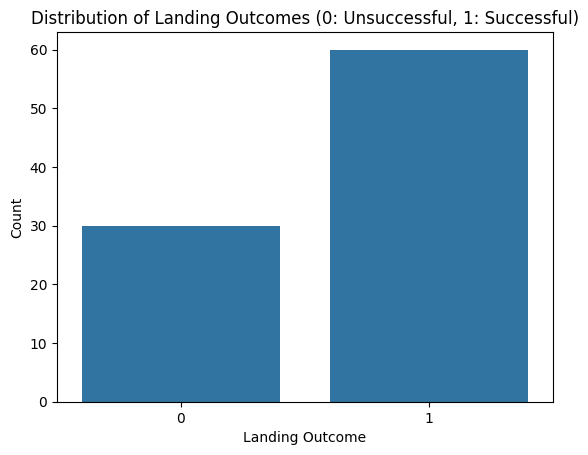

In [ ]:
sns.countplot(x='Class', data=data)
plt.title('Distribution of Landing Outcomes (0: Unsuccessful, 1: Successful)')
plt.xlabel('Landing Outcome')
plt.ylabel('Count')
plt.show()

Here are some example SQL queries for analyzing the Space X data, assuming it's in a table named `spacex_data`:

In [ ]:
-- Count the total number of records
SELECT COUNT(*) FROM spacex_data;

SyntaxError: invalid syntax (ipython-input-2014981379.py, line 1)

In [ ]:
-- Count the number of successful vs unsuccessful landings
SELECT Class, COUNT(*) FROM spacex_data GROUP BY Class;

SyntaxError: invalid syntax (ipython-input-229159560.py, line 1)

In [ ]:
-- Find the average payload mass for each orbit
SELECT Orbit, AVG(PayloadMass) FROM spacex_data GROUP BY Orbit ORDER BY AVG(PayloadMass) DESC;

SyntaxError: invalid syntax (ipython-input-1508028208.py, line 1)

In [ ]:
-- Count the number of launches from each launch site
SELECT LaunchSite, COUNT(*) FROM spacex_data GROUP BY LaunchSite;

SyntaxError: invalid syntax (ipython-input-2706805259.py, line 1)

In [ ]:
-- Find the top 5 most frequent booster versions
SELECT BoosterVersion, COUNT(*) as launch_count FROM spacex_data GROUP BY BoosterVersion ORDER BY launch_count DESC LIMIT 5;

SyntaxError: invalid syntax (ipython-input-3668610328.py, line 1)

In [ ]:
-- Find the number of launches per year
SELECT strftime('%Y', Date) as launch_year, COUNT(*) as launch_count FROM spacex_data GROUP BY launch_year ORDER BY launch_year;

SyntaxError: invalid syntax (ipython-input-3674350512.py, line 1)